In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# Logistic Regression

## Model

In [2]:
diabetes = pd.read_csv("diabetes.csv")
df = diabetes.copy()
df = df.dropna()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

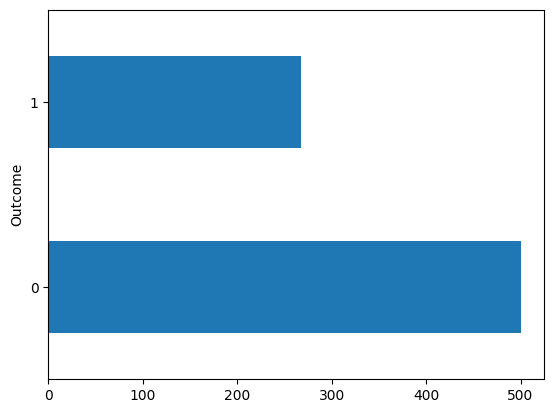

In [5]:
df["Outcome"].value_counts().plot.barh();

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

## Statsmodels

In [8]:
loj = sm.Logit(y, X)
loj_model= loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.608498
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                 0.05922
Time:                        10:28:27   Log-Likelihood:                -467.33
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 2.583e-10
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1284      0.029      4.484      0.000       0.072       0.185
Glucose                      0.0129      0.003      4.757      0.000       0.008       0.018
BloodPressure               -0.0303      0.005     -6.481      0.000      -0.039      -0.021
SkinThickness                0.0002      0.006      0.032      0.974      -0.012       0.012
Insulin                      0.0007      0.001      0.942      0.346      -0.001       0.002
BMI                         -0.0048      0.011     -0.449      0.653      -0.026       0.016
DiabetesPedigreeFunction     0.3203      0.240      1.335      0.182      -0.150       0.790
Age                         -0.0156      0.008     -1.852      0.064      -0.032       0.001
============================================================================================
"""

## Scikit-Learn

In [9]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(solver='liblinear')

In [10]:
loj_model.intercept_

array([-5.84073324])

In [11]:
loj_model.coef_

array([[ 1.16937119e-01,  2.82506791e-02, -1.69647463e-02,
         7.64900753e-04, -6.30568264e-04,  5.91967766e-02,
         6.68475894e-01,  7.08845329e-03]])

## Predict & Model Tuning

In [12]:
y_pred = loj_model.predict(X)

In [13]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [14]:
accuracy_score(y, y_pred)

0.7747395833333334

In [15]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [16]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [17]:
loj_model.predict_proba(X)[0:10][:,0:2]

array([[0.35208919, 0.64791081],
       [0.91613598, 0.08386402],
       [0.22544273, 0.77455727],
       [0.92033572, 0.07966428],
       [0.16985872, 0.83014128],
       [0.79768782, 0.20231218],
       [0.8787278 , 0.1212722 ],
       [0.2764273 , 0.7235727 ],
       [0.32085978, 0.67914022],
       [0.9216265 , 0.0783735 ]])

In [18]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [19]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [20]:
y_probs[0:10]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128,
       0.20231218, 0.1212722 , 0.7235727 , 0.67914022, 0.0783735 ])

In [21]:
y_pred = [1 if i > 0.5 else 0 for i in y_probs]

In [22]:
y_pred[0:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [23]:
confusion_matrix(y, y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [24]:
accuracy_score(y, y_pred)

0.7747395833333334

In [25]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [26]:
loj_model.predict_proba(X)[:,1][0:5]

array([0.64791081, 0.08386402, 0.77455727, 0.07966428, 0.83014128])

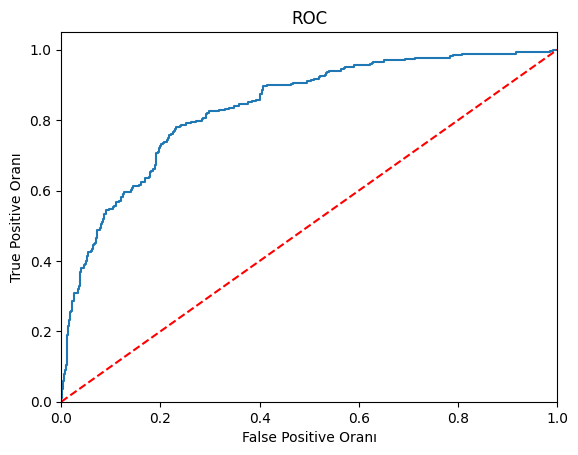

In [27]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.30, 
                                                    random_state = 42)


In [29]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train,y_train)
loj_model

LogisticRegression(solver='liblinear')

In [30]:
accuracy_score(y_test, loj_model.predict(X_test))

0.7532467532467533

In [31]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.7748188405797102

# Gaussian Naive Bayes

When dealing with many categorical variables with distinct characteristics, we often use Gaussian Naive Bayes. This algorithm assumes features follow a normal distribution, making it efficient and effective for high-dimensional datasets.



In [32]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [35]:
nb_model.predict(X_test)[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [36]:
nb_model.predict_proba(X_test)[0:10]

array([[0.73815858, 0.26184142],
       [0.94027894, 0.05972106],
       [0.97242831, 0.02757169],
       [0.82840069, 0.17159931],
       [0.47153473, 0.52846527],
       [0.47274458, 0.52725542],
       [0.99607705, 0.00392295],
       [0.69925055, 0.30074945],
       [0.53838117, 0.46161883],
       [0.25004536, 0.74995464]])

In [37]:
# test error calculation
y_pred = nb_model.predict(X_test)

In [38]:
# accuracy score calculation
accuracy_score(y_test, y_pred)

0.7445887445887446

In [39]:
# approved test error calculation
cross_val_score(nb_model, X_test, y_test, cv= 10).mean()

0.775

Logistic Regression = 0.774

Gaussian Naive Bayes = 0.775

## K-Nearest Neighbors (KNN)

Makes predictions based on the similarity of observations. It's like the saying, "Tell me who your friends are, and I'll tell you who you are." The algorithm classifies a data point by looking at its 'neighbors' and assigning the most common label among them.

## Model & Prediction

In [40]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [41]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [42]:
y_pred = knn_model.predict(X_test)

In [43]:
# primitive score
accuracy_score(y_test, y_pred)

0.6883116883116883

In [44]:
# verified value
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



## Model Tuning

In [45]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [46]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [47]:
print("The Best Score :" + str(knn_cv.best_score_)) # not important
print("The Best Params :" + str(knn_cv.best_params_))

The Best Score :0.748637316561845
The Best Params :{'n_neighbors': 11}


In [48]:
knn = KNeighborsClassifier(11)
knn_tuned = knn_cv.fit(X_train, y_train)

In [49]:
knn_tuned.score(X_test, y_test)

0.7316017316017316

In [50]:
y_pred = knn_tuned.predict(X_test)

In [51]:
accuracy_score(y_test, y_pred)

0.7316017316017316

# Support Vector Machines (SVM) 

Aim to find the optimal hyperplane that separates two classes. The goal is to identify a margin that contains as few observations as possible, ensuring clear separation between the classes. Initially developed for classification problems and were later adapted for regression tasks. 

## Linear SVM
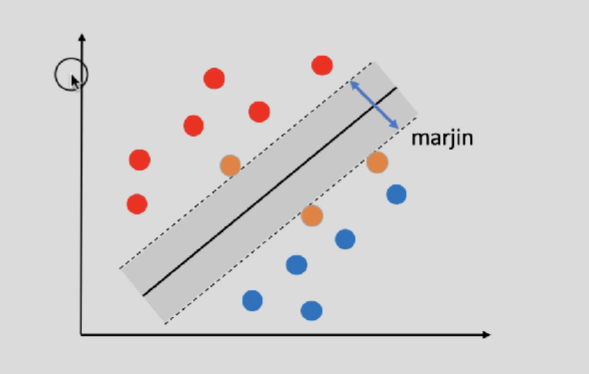


## Nonlinear SVM
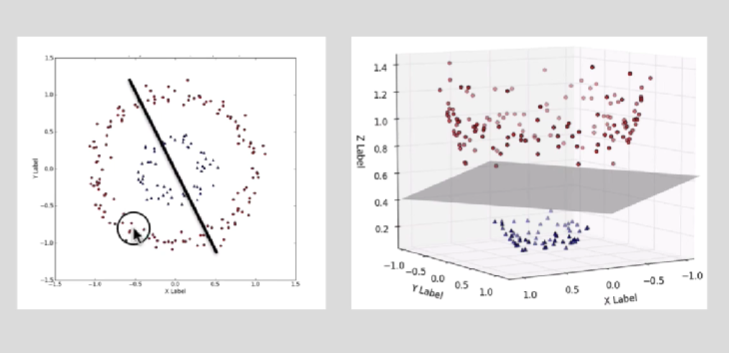

# Linear

## Model & Prediction

In [52]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [53]:
svm_model = SVC(kernel= "linear").fit(X_train, y_train)

In [54]:
svm_model

SVC(kernel='linear')

In [55]:
y_pred = svm_model.predict(X_test)

In [56]:
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [57]:
svc_params = {"C": np.arange(1,10)}

svc = SVC(kernel="linear")

svc_cv_model = GridSearchCV(svc,svc_params,
                            cv=10,
                            n_jobs=-1,
                             verbose=2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': array([1, 2, 3, 4, 5, 6, 7, 8, 9])}, verbose=2)

In [58]:
print("The Best Params :" + str(svc_cv_model.best_params_))

The Best Params :{'C': 5}


In [59]:
svc_tuned= SVC(kernel = "linear", C=5).fit(X_train, y_train)

In [60]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# RBF SVC (nonlinear)

## Model & Prediction

In [61]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [62]:
svc_model = SVC(kernel = "rbf").fit(X_train, y_train)

In [63]:
svc_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

## Model Tuning

In [64]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
              "gamma": [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]}

In [65]:
svc = SVC()
svc_cv_model = GridSearchCV(svc,svc_params,
                            cv=10,
                            n_jobs=-1,
                             verbose=2 )

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [66]:
print("The Best Params :" + str(svc_cv_model.best_params_))

The Best Params :{'C': 10, 'gamma': 0.0001}


In [67]:
svc_tuned = SVC(C =10 , gamma=0.0001).fit(X_train, y_train)

In [68]:
y_pred = svc_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7359307359307359

# Artificial Neural Networks (ANNs)

In [69]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [70]:
from sklearn.preprocessing import StandardScaler

In [71]:
scaler = StandardScaler()

In [72]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
X_train_scaled[0:5]

array([[-0.8362943 , -0.80005088, -0.53576428, -0.15714558, -0.18973183,
        -1.06015343, -0.61421636, -0.94861028],
       [ 0.39072767, -0.49054341,  0.12804365,  0.55361931,  2.13020339,
         0.64646721, -0.90973787, -0.43466673],
       [-1.14304979,  0.43797901, -0.09322566,  1.39361417,  1.47853619,
         1.35537117, -0.30699103, -0.77729576],
       [ 0.08397217,  0.31417602, -0.09322566,  0.03669939,  0.74866893,
         0.14760887, -0.90681191, -0.43466673],
       [-0.8362943 , -0.5524449 , -2.19528409,  1.13515422,  0.02749057,
         1.48664968, -0.83951493, -0.00638043]])

In [74]:
X_test_scaled[0:5]

array([[ 0.69748316, -0.70719864, -0.64639893,  0.81207927,  0.95720244,
         0.26575953, -0.11680393,  0.85019217],
       [-0.52953881, -0.27388818,  0.29399563,  0.74746428, -0.6936878 ,
         0.488933  , -0.94192338, -1.03426754],
       [-0.52953881, -0.39769117, -0.31449497, -1.3202154 , -0.6936878 ,
        -0.1543317 , -0.91266382, -1.03426754],
       [ 1.31099414, -0.42864191,  0.57058226, -1.3202154 , -0.6936878 ,
        -0.96825847,  1.12965312,  0.07927683],
       [ 1.00423865,  0.46892976,  1.12375553, -1.3202154 , -0.6936878 ,
        -0.27248236, -0.76051413,  1.44979298]])

In [75]:
from sklearn.neural_network import MLPClassifier

In [76]:
mlpc= MLPClassifier().fit(X_train_scaled, y_train)

In [77]:
# coefficients
mlpc.coefs_

[array([[ 0.00605732, -0.06056053,  0.01928807, -0.07894789, -0.18359242,
         -0.25108457,  0.11472364, -0.20103634,  0.12127727, -0.13676502,
          0.00518909,  0.07721466, -0.08847338,  0.10744907, -0.08158453,
         -0.00853258, -0.09013703, -0.19841007, -0.01286947, -0.21103185,
          0.03992158,  0.05569289, -0.11686908,  0.09913741,  0.09715672,
          0.13685752,  0.20695975, -0.10767507,  0.25939222,  0.18837746,
          0.05133896, -0.11866058,  0.06985039, -0.08542969, -0.04012466,
         -0.30848838, -0.37339064, -0.20618767,  0.16186732,  0.24617571,
          0.01986451,  0.29280953,  0.04814039, -0.08485151,  0.09210575,
          0.10835108,  0.02601163, -0.44184923, -0.17264505, -0.02705643,
         -0.2127273 , -0.45507262,  0.25834268,  0.24001188,  0.10590199,
          0.14889528,  0.23259559, -0.29149339,  0.01382681, -0.2854437 ,
         -0.11158991,  0.07086691, -0.09664513, -0.17083575,  0.05768751,
          0.20209377, -0.05072868,  0.

In [78]:
dir(mlpc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_backprop',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_solver',
 '_compute_loss_grad',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_fit',
 '_fit_lbfgs',
 '_fit_stochastic',
 '_forward_pass',
 '_forward_pass_fast',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_init_coef',
 '_initialize',
 '_label_binarizer',
 '_loss_grad_lbfgs',
 '_more_tags',
 '_no

In [79]:
y_pred = mlpc.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

## Model Tuning

In [80]:
?mlpc

Type:        MLPClassifier
String form: MLPClassifier()
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py
Docstring:  
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic
gradient descent.

.. versionadded:: 0.18

Parameters
----------
hidden_layer_sizes : array-like of shape(n_layers - 2,), default=(100,)
    The ith element represents the number of neurons in the ith
    hidden layer.

activation : {'identity', 'logistic', 'tanh', 'relu'}, default='relu'
    Activation function for the hidden layer.

    - 'identity', no-op activation, useful to implement linear bottleneck,
      returns f(x) = x

    - 'logistic', the logistic sigmoid function,
      returns f(x) = 1 / (1 + exp(-x)).

    - 'tanh', the hyperbolic tan function,
      returns f(x) = tanh(x).

    - 'relu', the rectified linear unit function,
      returns f(x) = max(0, x)

solver : 

In [81]:
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001, 0.00001],
               "hidden_layer_sizes": [(10,10,10),
                                      (100,100,100),
                                      (100,100),
                                      (3,5),
                                      (5,3)],
                "solver": ["lbfgs","adam","sgd"],
                "activation": ["relu","logistic"]
}

In [82]:
mlpc = MLPClassifier()
mlpc_cv_model = GridSearchCV(mlpc, mlpc_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2
                             )
mlpc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [83]:
print("The Best Params :" + str(mlpc_cv_model.best_params_))

The Best Params :{'activation': 'logistic', 'alpha': 0.01, 'hidden_layer_sizes': (100, 100), 'solver': 'adam'}


In [84]:
mlpc_tuned = MLPClassifier(activation="logistic",
                           alpha=0.1,
                           hidden_layer_sizes=(100, 100, 100),
                           solver="adam"
                           )

In [85]:
mlpc_tuned.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', alpha=0.1,
              hidden_layer_sizes=(100, 100, 100))

In [86]:
y_pred = mlpc_tuned.predict(X_test_scaled)
accuracy_score(y_test, y_pred)

0.7316017316017316

# Classification and Regression Trees (CART)

In [87]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [90]:
cart_model

DecisionTreeClassifier()

In [91]:
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))


((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 0 if x[6] <= 0.39149999618530273 else 1) if x[5] <=
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 0 if x[4] <= 57.5 else 1) if x[5] <= 
    30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if x[5
    ] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 32.45000076293945 else
    0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else (1 if x[7] <= 29.5 else
    (1 if x[6] <= 0.4359999895095825 else 0) if x[5] <= 9.649999618530273 else
    0 if x[1] <= 133.0 else (1 if x[1] <= 142.0 else 0) if x[0] <= 5.0 else
    0) if x

In [92]:
x = [9]

In [93]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)


1

In [94]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

## Model Tuning

In [95]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\sklearn\tree\_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_

In [96]:
cart_grid = {"max_depth": range(1,10),
             "min_samples_split": list(range(2,50)) }

In [97]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv=10, n_jobs= -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


In [98]:
print("The Best Params :" + str(cart_cv_model.best_params_))

The Best Params :{'max_depth': 5, 'min_samples_split': 19}


Final Model

In [99]:
cart = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=19)
cart_tuned = cart.fit(X_train, y_train)

In [100]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7056277056277056

# Random Forest Classification

In [101]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [103]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [104]:
rf_model

RandomForestClassifier()

In [105]:
y_pred = rf_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

## Model Tuning

In [106]:
?rf_model

Type:        RandomForestClassifier
String form: RandomForestClassifier()
Length:      100
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\sklearn\ensemble\_forest.py
Docstring:  
A random forest classifier.

A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
Trees in the forest use the best split strategy, i.e. equivalent to passing
`splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

For a comparison between tree-based ensemble models see the example
:ref:`sphx_glr_auto_examples_ensemble_plot_forest_hist_grad_boosting_comparison.py`.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : i

In [107]:
rf_params= {"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]
            }

In [108]:
rf_model = RandomForestClassifier()

rf_cv_model = GridSearchCV(rf_model,
                           rf_params,
                           cv=10,
                           n_jobs=-1,
                           verbose=2)

In [109]:
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [110]:
print("The Best Params :" + str(rf_cv_model.best_params_))

The Best Params :{'max_depth': 10, 'max_features': 5, 'min_samples_split': 5, 'n_estimators': 1000}


Final

In [111]:
rf_tuned = RandomForestClassifier(max_depth=8,
                                  max_features=5,
                                  min_samples_split=5,
                                  n_estimators=10)

rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=5,
                       n_estimators=10)

In [112]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

Calculating the importance of the features

In [113]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100},
                         index = X_train.columns)

Text(0.5, 0, 'Feature Levels of Importance ')

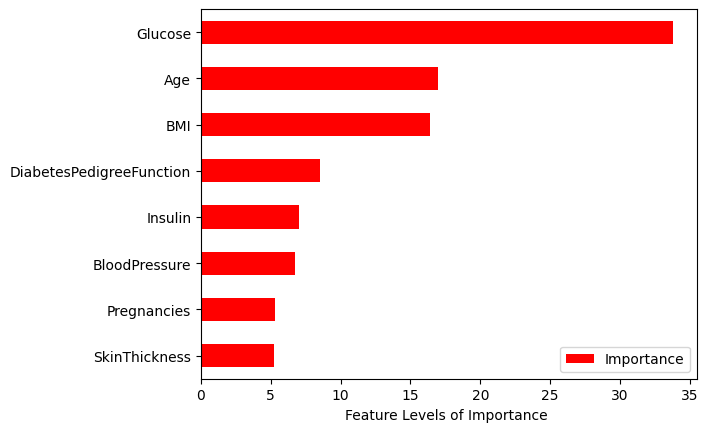

In [116]:
Importance.sort_values(by = "Importance", 
                       axis = 0, 
                       ascending = True).plot(kind ="barh", color = "r")

plt.xlabel("Feature Levels of Importance ")

# Gradient Boosting Machines (GBM)

Can weak classifiers combine to form a strong classifier?
Models are dependent on each other in bagging, while they are independent in boosting


In [117]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gbm_model = GradientBoostingClassifier().fit(X_train, y_train)

In [121]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred) # accuracy score without valitadition

0.7489177489177489

# Model Tuning

In [122]:
gbm_model

GradientBoostingClassifier()

In [123]:
?gbm_model

Type:        GradientBoostingClassifier
String form: GradientBoostingClassifier()
Length:      100
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\sklearn\ensemble\_gb.py
Docstring:  
Gradient Boosting for classification.

This algorithm builds an additive model in a forward stage-wise fashion; it
allows for the optimization of arbitrary differentiable loss functions. In
each stage ``n_classes_`` regression trees are fit on the negative gradient
of the loss function, e.g. binary or multiclass log loss. Binary
classification is a special case where only a single regression tree is
induced.

:class:`sklearn.ensemble.HistGradientBoostingClassifier` is a much faster
variant of this algorithm for intermediate datasets (`n_samples >= 10_000`).

Read more in the :ref:`User Guide <gradient_boosting>`.

Parameters
----------
loss : {'log_loss', 'exponential'}, default='log_loss'
    The loss function to be optimized. 'log_loss' refers to binomial and
    mu

In [128]:
gbm_params = {"learning_rate": [0.001, 0.01, 0.1, 0.5],
              "n_estimators": [100,500,1000],
              "max_depth": [3,5,10],
              "min_samples_split": [2,5,10]}

In [129]:
gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv= 10, n_jobs = -1, verbose=2)

In [130]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]},
             verbose=2)

In [132]:
print("The Best Params :" + str(gbm_cv.best_params_))

The Best Params :{'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}


Final model

In [134]:
gbm = GradientBoostingClassifier(learning_rate = 0.1,
                                 max_depth = 3,
                                 min_samples_split = 5,
                                 n_estimators = 100
                                 )

In [136]:
gbm_tuned =  gbm.fit(X_train, y_train)

In [137]:
y_pred = gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# eXtreme Gradient Boosting (XGBoost)

In [138]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [141]:
from xgboost import XGBClassifier

In [146]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [147]:
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [149]:
y_pred = xgb_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7272727272727273

## Model Tuning

In [150]:
?xgb_model

Type:        XGBClassifier
String form:
XGBClassifier(base_score=None, booster=None, callbacks=None,
           colsample_bylevel=None <...> ne, n_estimators=None, n_jobs=None,
           num_parallel_tree=None, random_state=None, ...)
File:        c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost classification.
See :doc:`/python/sklearn_estimator` for more information.

Parameters
----------

    n_estimators : Optional[int]
        Number of boosting rounds.

    max_depth :  typing.Optional[int]

        Maximum tree depth for base learners.

    max_leaves : typing.Optional[int]

        Maximum number of leaves; 0 indicates no limit.

    max_bin : typing.Optional[int]

        If using histogram-based algorithm, maximum number of bins per feature

    grow_policy : typing.Optional[str]

        Tree growing policy.

        - depthwise: Favors splitting at nodes closest to t

In [160]:
xgb_params = {"n_estimators": [100, 500, 1000, 2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth": [3, 4, 5, 6],
              "learning_rate" : [0.1, 0.01, 0.02, 0.05],
              "min_samples_split": [2,5,10]}

In [161]:
xgb = XGBClassifier()

xgb_cv_model = GridSearchCV(xgb, xgb_params, cv= 10, n_jobs = -1, verbose=2)

In [162]:
xgb_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [163]:
xgb_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [167]:
xgb = XGBClassifier(learning_rate=0.05,
                    max_depth=3,
                    min_samples_split=2,
                    n_estimators=100,
                    subsample=1.0)

In [201]:
xgb_tuned = xgb.fit(X_train, y_train)

In [202]:
y_pred = xgb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7662337662337663

# Light GBM

In [170]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [171]:
from lightgbm import LGBMClassifier

In [173]:
lgbm_model = LGBMClassifier().fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [174]:
y_pred = lgbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7229437229437229

## Model Tuning

In [176]:
?lgbm_model

Type:           LGBMClassifier
String form:    LGBMClassifier()
File:           c:\users\zeyne\appdata\local\programs\python\python312\lib\site-packages\lightgbm\sklearn.py
Docstring:      LightGBM classifier.
Init docstring:
Construct a gradient boosting model.

Parameters
----------
boosting_type : str, optional (default='gbdt')
    'gbdt', traditional Gradient Boosting Decision Tree.
    'dart', Dropouts meet Multiple Additive Regression Trees.
    'rf', Random Forest.
num_leaves : int, optional (default=31)
    Maximum tree leaves for base learners.
max_depth : int, optional (default=-1)
    Maximum tree depth for base learners, <=0 means no limit.
    If setting this to a positive value, consider also changing ``num_leaves`` to ``<= 2^max_depth``.
learning_rate : float, optional (default=0.1)
    Boosting learning rate.
    You can use ``callbacks`` parameter of ``fit`` method to shrink/adapt learning rate
    in training using ``reset_parameter`` callback.
    Note, that this wil

In [177]:
lgbm_params = {"n_estimators": [100, 500, 1000, 2000],
              "subsample": [0.6, 0.8, 1.0],
              "max_depth": [3, 4, 5, 6],
              "learning_rate" : [0.1, 0.01, 0.02, 0.05],
              "min_child_samples": [5, 10, 20]}

In [179]:
lgbm = LGBMClassifier()

lgbm_cv_model = GridSearchCV(lgbm, lgbm_params, cv= 10, n_jobs = -1, verbose=2)

In [180]:
lgbm_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits
[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

GridSearchCV(cv=10, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_child_samples': [5, 10, 20],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [181]:
lgbm_cv_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 3,
 'min_child_samples': 20,
 'n_estimators': 100,
 'subsample': 0.6}

In [225]:
lgbm = LGBMClassifier(learning_rate=0.05,
                    max_depth=3,
                    min_child_samples=20,
                    n_estimators=100,
                    subsample=0.6)

In [207]:
lgbm_tuned =lgbm.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 188, number of negative: 349
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000750 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 606
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.350093 -> initscore=-0.618630
[LightGBM] [Info] Start training from score -0.618630
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [208]:
y_pred = lgbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7489177489177489

# Category Boosting (CatBoost)

In [216]:
df = diabetes.copy()
df = df.dropna()
y =df["Outcome"]
X = df.drop(['Outcome'], axis=1)
#X = df["Pregnancies"]
X = pd.DataFrame(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30,
                                                    random_state=42)

In [217]:
from catboost import CatBoostClassifier

In [218]:
cat_model=CatBoostClassifier().fit(X_train, y_train)

Learning rate set to 0.0079
0:	learn: 0.6879744	total: 6.09ms	remaining: 6.08s
1:	learn: 0.6843414	total: 10.1ms	remaining: 5.05s
2:	learn: 0.6805760	total: 14.2ms	remaining: 4.73s
3:	learn: 0.6765782	total: 19.1ms	remaining: 4.75s
4:	learn: 0.6720829	total: 24.4ms	remaining: 4.85s
5:	learn: 0.6681617	total: 28.8ms	remaining: 4.76s
6:	learn: 0.6641912	total: 32.8ms	remaining: 4.65s
7:	learn: 0.6602881	total: 37ms	remaining: 4.59s
8:	learn: 0.6562626	total: 41.6ms	remaining: 4.58s
9:	learn: 0.6528483	total: 45.8ms	remaining: 4.53s
10:	learn: 0.6487823	total: 49.7ms	remaining: 4.46s
11:	learn: 0.6454980	total: 54ms	remaining: 4.44s
12:	learn: 0.6418953	total: 57.9ms	remaining: 4.4s
13:	learn: 0.6374431	total: 61.9ms	remaining: 4.36s
14:	learn: 0.6339676	total: 67.4ms	remaining: 4.43s
15:	learn: 0.6304252	total: 72ms	remaining: 4.42s
16:	learn: 0.6266998	total: 76.2ms	remaining: 4.41s
17:	learn: 0.6237660	total: 80.6ms	remaining: 4.4s
18:	learn: 0.6204394	total: 84.5ms	remaining: 4.36s
19

In [219]:
y_pred = cat_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403

## Model Tuning

In [220]:
catb_params = {
    'iterations': [200,500],
    'learning_rate': [0.01,0.05, 0.1],
    'depth': [3,5,8] }

In [221]:
catb = CatBoostClassifier()
catb_cv_model = GridSearchCV(catb, catb_params, cv=5, n_jobs = -1, verbose = 2)
catb_cv_model.fit(X_train, y_train)
catb_cv_model.best_params_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
0:	learn: 0.6863312	total: 4.37ms	remaining: 871ms
1:	learn: 0.6811157	total: 8.63ms	remaining: 855ms
2:	learn: 0.6752970	total: 13.2ms	remaining: 870ms
3:	learn: 0.6697432	total: 18ms	remaining: 880ms
4:	learn: 0.6641758	total: 21.8ms	remaining: 850ms
5:	learn: 0.6576656	total: 25.8ms	remaining: 833ms
6:	learn: 0.6521870	total: 30.1ms	remaining: 831ms
7:	learn: 0.6465564	total: 34.7ms	remaining: 833ms
8:	learn: 0.6407595	total: 38.7ms	remaining: 821ms
9:	learn: 0.6357725	total: 43.1ms	remaining: 819ms
10:	learn: 0.6299942	total: 47ms	remaining: 808ms
11:	learn: 0.6240480	total: 51ms	remaining: 800ms
12:	learn: 0.6196095	total: 55ms	remaining: 792ms
13:	learn: 0.6148715	total: 59.6ms	remaining: 792ms
14:	learn: 0.6092626	total: 63.3ms	remaining: 780ms
15:	learn: 0.6046764	total: 67ms	remaining: 770ms
16:	learn: 0.6012725	total: 70.5ms	remaining: 758ms
17:	learn: 0.5958121	total: 74.3ms	remaining: 751ms
18:	learn: 0.5903243	to

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [222]:
catb_cv_model.best_params_

{'depth': 8, 'iterations': 200, 'learning_rate': 0.01}

In [223]:
catb = CatBoostClassifier(iterations = 200, 
                          learning_rate = 0.05, 
                          depth = 5)

catb_tuned = catb.fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)

0:	learn: 0.6616270	total: 2.25ms	remaining: 449ms
1:	learn: 0.6400322	total: 4.26ms	remaining: 422ms
2:	learn: 0.6218089	total: 5.87ms	remaining: 385ms
3:	learn: 0.6091426	total: 7.45ms	remaining: 365ms
4:	learn: 0.5937764	total: 9.11ms	remaining: 355ms
5:	learn: 0.5776944	total: 11.2ms	remaining: 363ms
6:	learn: 0.5640806	total: 13.3ms	remaining: 366ms
7:	learn: 0.5465023	total: 15.2ms	remaining: 366ms
8:	learn: 0.5342910	total: 17.2ms	remaining: 365ms
9:	learn: 0.5253110	total: 19.3ms	remaining: 367ms
10:	learn: 0.5152173	total: 21.1ms	remaining: 362ms
11:	learn: 0.5038768	total: 22.7ms	remaining: 356ms
12:	learn: 0.4940545	total: 24.2ms	remaining: 348ms
13:	learn: 0.4868880	total: 25.9ms	remaining: 344ms
14:	learn: 0.4799839	total: 27.6ms	remaining: 340ms
15:	learn: 0.4744068	total: 29.3ms	remaining: 337ms
16:	learn: 0.4684004	total: 31.5ms	remaining: 339ms
17:	learn: 0.4618850	total: 33.3ms	remaining: 336ms
18:	learn: 0.4560376	total: 34.9ms	remaining: 332ms
19:	learn: 0.4520084	t

In [224]:
y_pred = catb_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

# Performance Comparison


In [226]:
models = [
    knn_tuned,
    loj_model,
    svc_tuned,
    nb_model,
    mlpc_tuned,
    cart_tuned,
    rf_tuned,
    gbm_tuned,
    catb_tuned,
    lgbm_tuned,
    xgb_tuned
]

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("-"*28)
    print(names + ":")
    print("Accuracy: {:.4%}".format(accuracy))


----------------------------
GridSearchCV:
Accuracy: 73.1602%
----------------------------
LogisticRegression:
Accuracy: 75.3247%
----------------------------
SVC:
Accuracy: 73.5931%
----------------------------
GaussianNB:
Accuracy: 74.4589%
----------------------------
MLPClassifier:
Accuracy: 34.6320%
----------------------------
DecisionTreeClassifier:
Accuracy: 75.3247%
----------------------------
RandomForestClassifier:
Accuracy: 72.2944%
----------------------------
XGBClassifier:
Accuracy: 76.6234%
----------------------------
CatBoostClassifier:
Accuracy: 74.4589%
----------------------------
LGBMClassifier:
Accuracy: 74.8918%
----------------------------
XGBClassifier:
Accuracy: 76.6234%


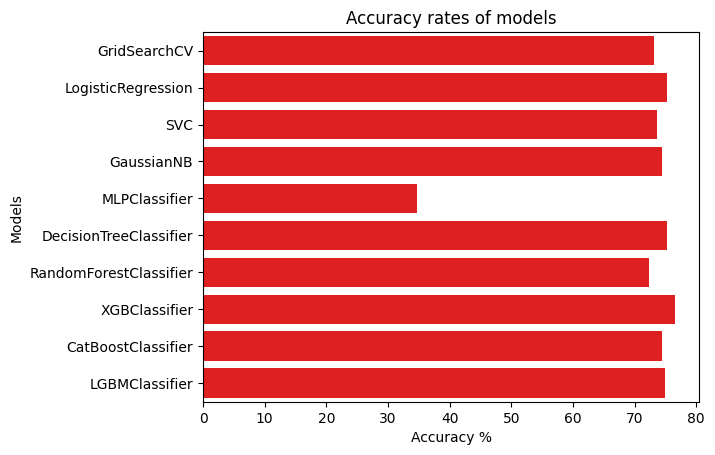

In [227]:
results_list = []

results = pd.DataFrame(columns= ["Models","Accuracy"])

for model in models:
    names = model.__class__.__name__
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results_list.append([names, accuracy * 100])

results = pd.DataFrame(results_list, columns=["Models", "Accuracy"])

sns.barplot(x='Accuracy', y='Models', data=results, color="r")
plt.xlabel('Accuracy %')
plt.title('Accuracy rates of models')
plt.show()
    